<a href="https://colab.research.google.com/github/yashmith-r/HandGestureRecogn/blob/main/HandGestureRecogn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train=pd.read_csv(r"C:\Users\nurbh\Downloads\archive\sign_mnist_train.csv")
test=pd.read_csv(r"C:\Users\nurbh\Downloads\archive\sign_mnist_test.csv")

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
labels=train['label'].values

In [ ]:
unique_val=np.array([labels])
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<Axes: ylabel='count'>

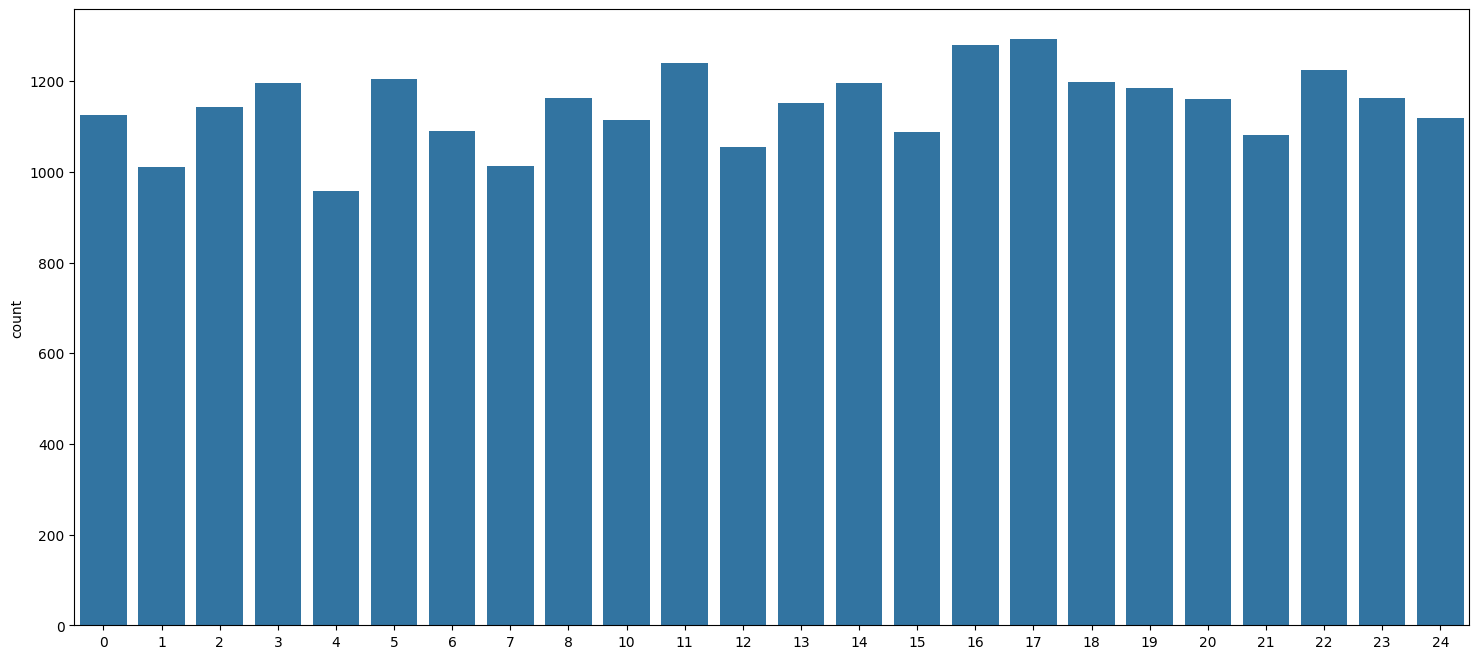

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(x=labels)

In [ ]:
train.drop('label',axis=1,inplace=True)

In [ ]:
images=train.values
images=np.array([np.reshape(i,(28,28)) for i in images])
images=np.array([i.flatten() for i in images])

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer=LabelBinarizer()
labels=label_binarizer.fit_transform(labels)

In [ ]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


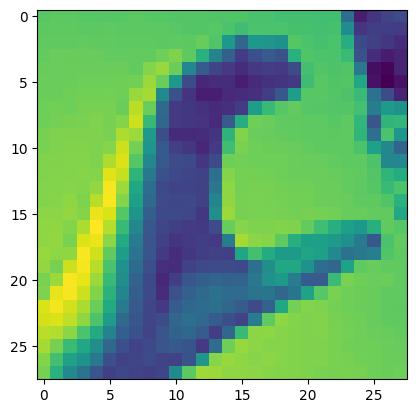

In [ ]:
index=2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [ ]:
import cv2

In [ ]:
# for i in range(0,10):
#     rand=np.random.randint(0,len(images))
#     input_im=images[rand]
#     sample=input_im.reshape(28,28).astype(np.uint8)
#     sample=cv2.resize(sample,None,fx=10,fy=10,interpolation=cv2.INTER_CUBIC)
#     cv2.imshow("sample image",sample)
#     cv2.waitKey(0)
# cv2.destroyAllWindows()


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
batch_size = 128
num_classes = 24
epochs = 10

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

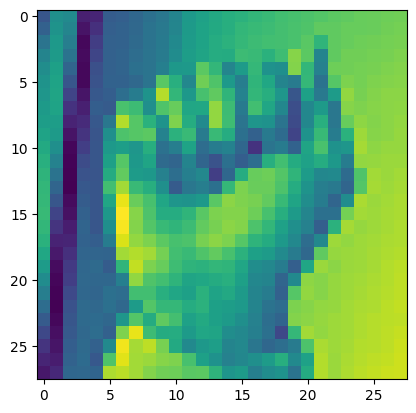

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
plt.imshow(x_train [0].reshape (28,28))

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
model=Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D (pool_size = (2, 2)))
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense (128, activation = 'relu'))
model.add(Dropout (0.20))
model.add(Dense (num_classes, activation = 'softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs,batch_size=batch_size)

Epoch 1/10
151/151 [==============================] - 13s 79ms/step - loss: 2.5835 - accuracy: 0.2114 - val_loss: 1.5346 - val_accuracy: 0.5151
Epoch 2/10
151/151 [==============================] - 13s 86ms/step - loss: 1.1723 - accuracy: 0.6017 - val_loss: 0.7630 - val_accuracy: 0.7567
Epoch 3/10
151/151 [==============================] - 13s 88ms/step - loss: 0.7211 - accuracy: 0.7535 - val_loss: 0.5142 - val_accuracy: 0.8486
Epoch 4/10
151/151 [==============================] - 13s 84ms/step - loss: 0.4662 - accuracy: 0.8436 - val_loss: 0.2909 - val_accuracy: 0.9105
Epoch 5/10
151/151 [==============================] - 13s 84ms/step - loss: 0.3074 - accuracy: 0.8978 - val_loss: 0.2204 - val_accuracy: 0.9349
Epoch 6/10
151/151 [==============================] - 13s 89ms/step - loss: 0.2062 - accuracy: 0.9355 - val_loss: 0.1227 - val_accuracy: 0.9695
Epoch 7/10
151/151 [==============================] - 13s 88ms/step - loss: 0.1375 - accuracy: 0.9587 - val_loss: 0.0820 - val_accuracy:

In [ ]:
model.save("sign_mnist_cnn_50_Epochs.h5")
print("Model Saved")

Model Saved


c:\Users\nurbh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


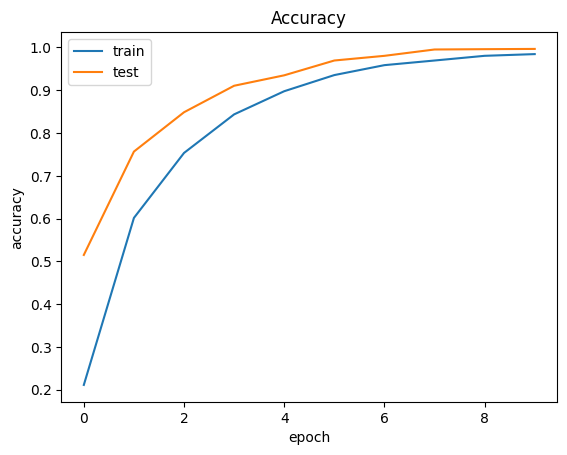

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
test = pd.read_csv(r"C:\Users\nurbh\Downloads\archive\sign_mnist_test.csv")
test_labels = test['label']
# test.drop('label', axis=1, inplace=True)


In [ ]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
test_labels = test['label']
test.drop('label', axis = 1, inplace=True)
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binarizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape
y_pred=model.predict(test_images)

225/225 [==============================] - 2s 8ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

0.7915504740658115

In [ ]:
def getLetter(result):
    classLabels = {
        0: 'A',  1: 'B',  2: 'C',  3: 'D',  4: 'E',  5: 'F',
        6: 'G',  7: 'H',  8: 'I',  9: 'K', 10: 'L', 11: 'M',
       12: 'N', 13: 'O', 14: 'P', 15: 'Q', 16: 'R', 17: 'S',
       18: 'T', 19: 'U', 20: 'V', 21: 'W', 22: 'X', 23: 'Y'
    }

    try:
        res = int(result)
        return classLabels[res]
    except KeyError:
        return "Invalid result key"
    except ValueError:
        return "Result must be an integer"


In [ ]:
import cv2

# Initialize video capture
cap = cv2.VideoCapture(0)

while True:
    # Read frame from the camera
    ret, frame = cap.read()


    # Flip the frame (optional)
    # frame = cv2.flip(frame, 1)

    # Define the region of interest (ROI)
    roi = frame[100:400, 320:620]
    cv2.imshow('ROI', roi)

    # Convert ROI to grayscale
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    cv2.imshow('ROI Scaled and Gray', roi)

    # Prepare frame copy with rectangle overlay
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255, 0, 0), 5)

    # Prepare ROI for model prediction
    roi = roi.reshape(1, 28, 28, 1)

    # Predict the class
    # result = str(model.predict_classes(roi, 1,verbose=0)[0])
    # Replace `model.predict_classes(roi, 1, verbose=0)[0]` with:
    result = np.argmax(model.predict(roi), axis=-1)[0]


    # Display prediction on the frame
    cv2.putText(copy, getLetter(result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('Frame', copy)

    # Exit on Enter key
    if cv2.waitKey(1) == 13:  # 13 is the Enter Key
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 30ms/step


KeyboardInterrupt: 